# EDA

1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형)

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화

도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사
carrier_deay : 항공사 지연 요인
atc_delay : ATC 항공교통관제 지연 요인
weather_delay : 날씨로 인한 지연 요인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [5]:
number_df = df[["pct_atc_delay", "pct_atc_delay", "pct_weather_delay"]]
number_df

,pct_atc_delay,pct_atc_delay,pct_weather_delay
0,1.971774,1.971774,0.762097
1,3.706107,3.706107,1.585878
2,2.706231,2.706231,2.026706
3,11.033333,11.033333,0.000000
4,3.365591,3.365591,1.774194
...,...,...,...
33463,8.798491,8.798491,1.651940
33464,3.591133,3.591133,0.261084
33465,2.664179,2.664179,0.343284
33466,1.964520,1.964520,0.122817


In [6]:
cate_df = df[["airline"]]
cate_df

,airline
0,American
1,American
2,American
3,American
4,American
...,...
33463,Southwest
33464,Southwest
33465,Southwest
33466,Southwest


In [7]:
# 수치형 변수의 최대, 최소, 대푯값
number_df.describe()


,pct_atc_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,5.089962,5.089962,0.684776
std,4.718647,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,2.146565,2.146565,0.000000
50%,3.900000,3.900000,0.316002
75%,6.630238,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [8]:
print(set(cate_df["airline"]))
print(df.airline.value_counts())

{'United', 'Alaska', 'Southwest', 'Jet Blue', 'Delta', 'American'}
airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64


In [9]:
# 항공사 별 기술 통계 비교
df.groupby("airline").describe().T


airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

'\n\ndelta 항공이 지연 확률이 더 높다?\n\n'

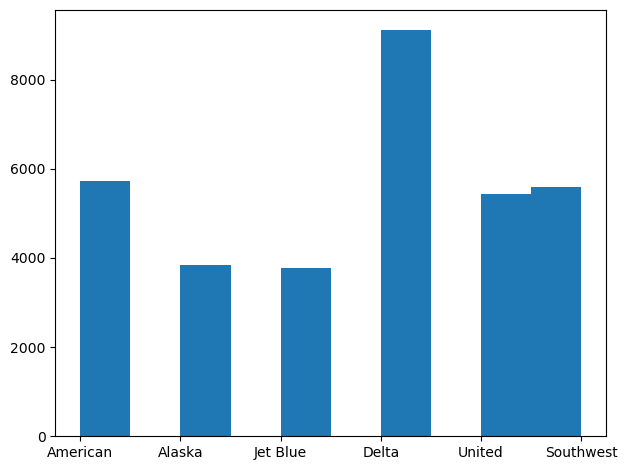

In [ ]:
plt.hist(df['airline'])
plt.tight_layout()

"""

delta 항공이 건수가 제일 많다?

"""

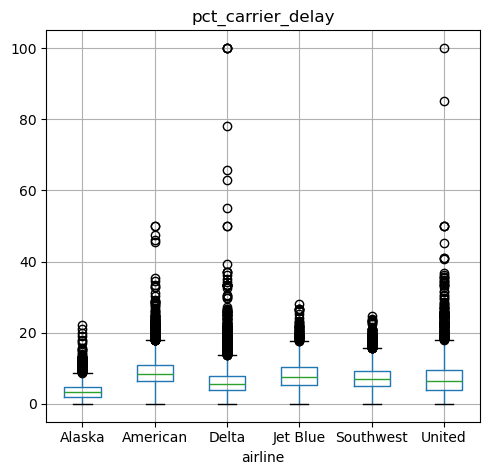

In [ ]:
ax = df.boxplot(by='airline', column='pct_carrier_delay', figsize=(5, 5))
plt.tight_layout()

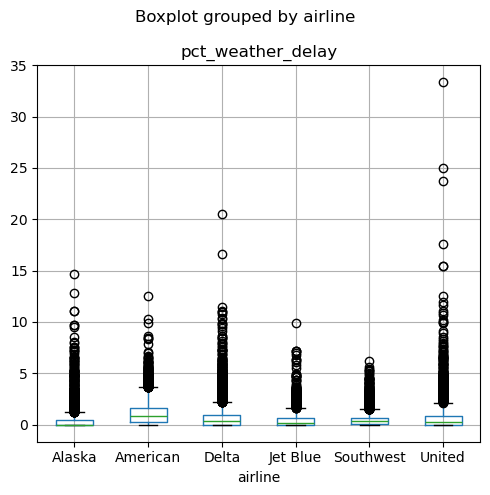

In [19]:
ax = df.boxplot(by='airline', column='pct_weather_delay', figsize=(5, 5))
plt.tight_layout()